 # IMPORING LIBRARIES and DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import shap
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [2]:
df = pd.read_csv("https://media.githubusercontent.com/media/TheSunnyBoy123/Win-Factor/refs/heads/main/mw_pw_profiles.csv")
df.shape

(416712, 58)

In [3]:
df.columns

Index(['player_id', 'match_id', 'gender', 'balls_per_over', 'start_date',
       'series_name', 'match_type', 'name_x', 'runs_scored', 'player_out',
       'balls_faced', 'fours_scored', 'sixes_scored', 'catches_taken',
       'run_out_direct', 'run_out_throw', 'stumpings_done', 'out_kind',
       'dot_balls_as_batsman', 'order_seen', 'balls_bowled', 'runs_conceded',
       'wickets_taken', 'bowled_done', 'lbw_done', 'maidens',
       'dot_balls_as_bowler', 'player_team', 'opposition_team', 'name_y',
       'unique_name', 'key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz',
       'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2',
       'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive',
       'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay',
       'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2',
       'full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams',
       'fantasy_score_batting', 'fantasy_score_bowling',


# Working on Data

In [4]:
df['match_date'] = pd.to_datetime(df['start_date'])
df.head()

,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,player_out,...,key_pulse_2,full_name,batting_style,bowling_style,playing_role,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total,match_date
0,00015688,1158348,female,6,2018-08-21,Botswana Cricket Association Women's T20I Series,T20,M King,10,1,...,NaN,NaN,NaN,NaN,NaN,[],5,8,17,2018-08-21
1,00015688,1182644,female,6,2019-05-05,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,8,1,...,NaN,NaN,NaN,NaN,NaN,[],3,0,7,2019-05-05
2,00015688,1275107,female,6,2021-09-09,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,0,...,NaN,NaN,NaN,NaN,NaN,[],1,0,5,2021-09-09
3,00015688,1275113,female,6,2021-09-15,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,0,0,...,NaN,NaN,NaN,NaN,NaN,[],0,0,4,2021-09-15
4,00015688,1275125,female,6,2021-09-14,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,1,...,NaN,NaN,NaN,NaN,NaN,[],-5,0,-1,2021-09-14


In [5]:
df.sort_values(by='match_date', inplace=True)
df.tail()

,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,player_out,...,key_pulse_2,full_name,batting_style,bowling_style,playing_role,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total,match_date
121900,4e38a3d6,1485778,female,6,2025-05-20,ICC Women's T20 World Cup Asia Region Qualifier,T20,R Poddar,4,1,...,NaN,NaN,NaN,NaN,NaN,[],-2,0,2,2025-05-20
305516,bd36bc39,1485778,female,6,2025-05-20,ICC Women's T20 World Cup Asia Region Qualifier,T20,S Chaturongrattana,0,0,...,NaN,NaN,NaN,NaN,NaN,[],0,16,20,2025-05-20
401343,f6ddfe08,1485778,female,6,2025-05-20,ICC Women's T20 World Cup Asia Region Qualifier,T20,C Sutthiruang,0,0,...,NaN,NaN,NaN,NaN,NaN,[],0,12,16,2025-05-20
258473,a2f46292,1473500,male,6,2025-05-20,Indian Premier League,T20,KK Ahmed,0,0,...,NaN,NaN,NaN,NaN,NaN,[],0,-4,0,2025-05-20
238281,97e6e41a,1485778,female,6,2025-05-20,ICC Women's T20 World Cup Asia Region Qualifier,T20,K Kunwar,24,0,...,NaN,NaN,NaN,NaN,NaN,[],25,0,29,2025-05-20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416712 entries, 397451 to 238281
Data columns (total 59 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   player_id              416712 non-null  object        
 1   match_id               416712 non-null  object        
 2   gender                 416712 non-null  object        
 3   balls_per_over         416712 non-null  int64         
 4   start_date             416712 non-null  object        
 5   series_name            414752 non-null  object        
 6   match_type             416712 non-null  object        
 7   name_x                 416712 non-null  object        
 8   runs_scored            416712 non-null  int64         
 9   player_out             416712 non-null  int64         
 10  balls_faced            416712 non-null  int64         
 11  fours_scored           416712 non-null  int64         
 12  sixes_scored           416712 non-null  int6

In [7]:
df.isnull().sum()

,0
player_id,0
match_id,0
gender,0
balls_per_over,0
start_date,0
series_name,1960
match_type,0
name_x,0
runs_scored,0
player_out,0


In [8]:
data = df.copy()
df= df.drop(columns=[
    'gender','name_x', 'name_y','key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz', 'key_cricheroes','key_crichq', 'key_cricinfo', 'key_cricinfo_2', 'key_cricinfo_3','full_name',
    'key_cricingif', 'key_cricketarchive', 'key_cricketarchive_2','key_cricketworld', 'key_nvplay', 'key_nvplay_2', 'key_opta', 'key_opta_2','key_pulse', 'key_pulse_2','batting_style', 'bowling_style','playing_role','teams'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416712 entries, 397451 to 238281
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   player_id              416712 non-null  object        
 1   match_id               416712 non-null  object        
 2   balls_per_over         416712 non-null  int64         
 3   start_date             416712 non-null  object        
 4   series_name            414752 non-null  object        
 5   match_type             416712 non-null  object        
 6   runs_scored            416712 non-null  int64         
 7   player_out             416712 non-null  int64         
 8   balls_faced            416712 non-null  int64         
 9   fours_scored           416712 non-null  int64         
 10  sixes_scored           416712 non-null  int64         
 11  catches_taken          416712 non-null  int64         
 12  run_out_direct         416712 non-null  int6

# Feature Engineering

In [10]:
team_encoder = LabelEncoder()
opp_encoder = LabelEncoder()
matchtype_encoder = LabelEncoder()
outkind_encoder = LabelEncoder()

# Apply encodings
df['player_team_enc'] = team_encoder.fit_transform(df['player_team'])
df['opposition_team_enc'] = opp_encoder.fit_transform(df['opposition_team'])
df['match_type_enc'] = matchtype_encoder.fit_transform(df['match_type'])
df['out_kind_enc'] = outkind_encoder.fit_transform(df['out_kind'])

Generating new features

In [11]:
df['batting_strike_rate'] = df.apply(lambda row: (row['runs_scored'] / row['balls_faced']) * 100 if row['balls_faced'] > 0 else 0,axis=1)

In [12]:
df['bowling_economy'] = df.apply(lambda row: (row['runs_conceded'] / (row['balls_bowled'] / 6)) if row['balls_bowled'] > 0 else 0,axis=1)

In [13]:
df['fielding_total'] = df['catches_taken'] + df['run_out_direct'] + df['run_out_throw'] + df['stumpings_done']

In [14]:
df.fillna(0, inplace=True)

Finalizing the target and features

In [15]:
drop_features = [
    'player_id', 'match_id', 'start_date', 'match_date',
    'series_name', 'match_type', 'player_team', 'opposition_team', 'out_kind',
    'fantasy_score_batting', 'fantasy_score_bowling', 'unique_name'
]

x = df.drop(columns=drop_features + ['fantasy_score_total'])
y = df['fantasy_score_total']

Splitting the data into training and testing

In [16]:
train_df = df[df['match_date'].dt.year <= 2022]
test_df = df[df['match_date'].dt.year > 2022]

x_train = train_df[x.columns]
y_train = train_df['fantasy_score_total']

x_test = test_df[x.columns]
y_test = test_df['fantasy_score_total']

x_train.shape

(305151, 26)

Visualizing the samples we have on timeline

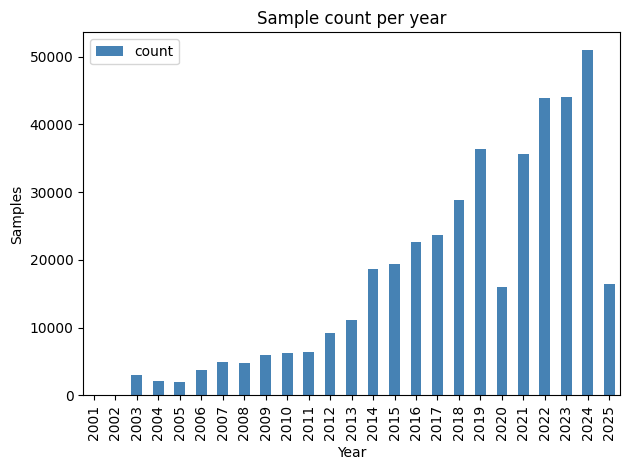

In [17]:
df['year'] = df['match_date'].dt.year
df['year'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title("Sample count per year")
plt.xlabel("Year")
plt.ylabel("Samples")
plt.legend()
plt.tight_layout()
plt.show()

# MODELS IMPLEMENTATION

## LINEAR REGRESSION

In [18]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

lr_predict = lr_model.predict(x_test)

mae_lr = mean_absolute_error(y_test, lr_predict)
mse_lr = mean_squared_error(y_test, lr_predict)
r2_lr = r2_score(y_test, lr_predict)

print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)

Mean Absolute Error: 3.731443882970503
Mean Squared Error: 35.441853069847184
R-squared: 0.9795310090940997


## DECISION TREE

In [23]:
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(x_train, y_train)

dt_predict = dt_model.predict(x_test)

mae_dt = mean_absolute_error(y_test, dt_predict)
mse_dt = mean_squared_error(y_test, dt_predict)
r2_dt = r2_score(y_test, dt_predict)

print("Mean Absolute Error:", mae_dt)
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)

Mean Absolute Error: 3.243073131062182
Mean Squared Error: 24.874992994264485
R-squared: 0.9856337645669798


## XGBOOST

In [20]:
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, random_state=42)
xgb_model.fit(x_train, y_train)
xgb_predict = xgb_model.predict(x_test)

mae_xgb = mean_absolute_error(y_test, xgb_predict)
mse_xgb = mean_squared_error(y_test, xgb_predict)
r2_xgb = r2_score(y_test, xgb_predict)

print("Mean Absolute Error:", mae_xgb)
print("Mean Squared Error:", mse_xgb)
print("R-squared:", r2_xgb)

Mean Absolute Error: 0.7961627840995789
Mean Squared Error: 2.796628952026367
R-squared: 0.9983848333358765


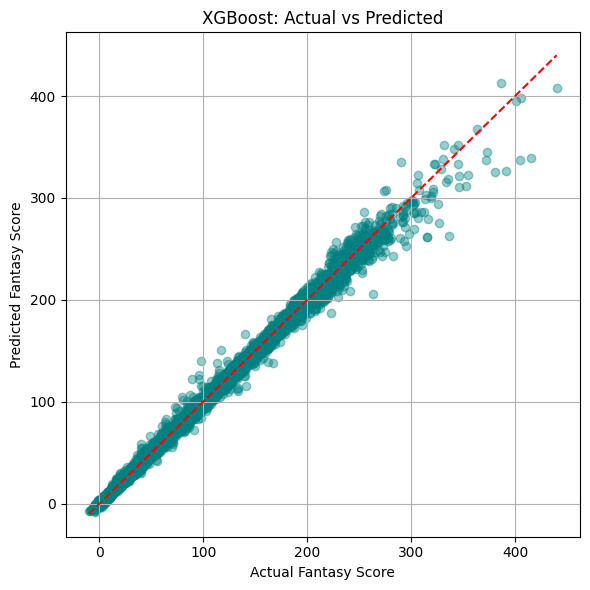

In [21]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, xgb_predict, alpha=0.4, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fantasy Score")
plt.ylabel("Predicted Fantasy Score")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## SHAP Analysis

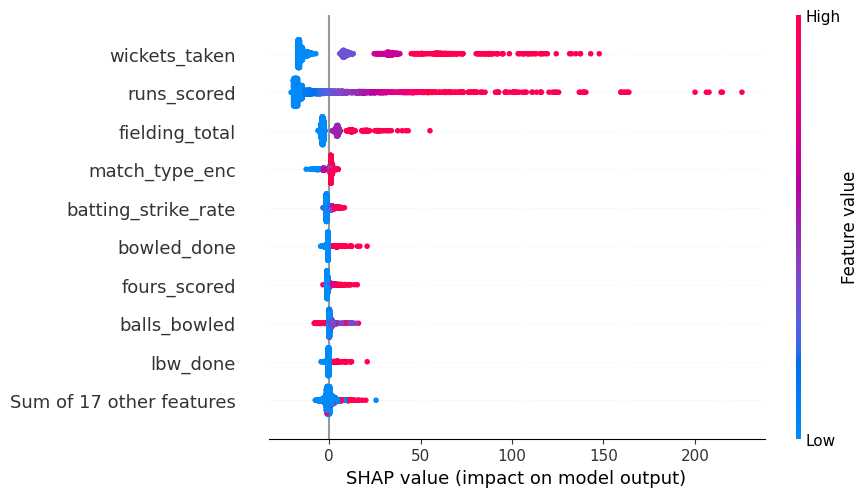

In [24]:
x_shap_sample = x_test.sample(n=3000, random_state=42)

explainer = shap.Explainer(xgb_model)
shap_values = explainer(x_shap_sample)

shap.plots.beeswarm(shap_values)


## PCA Implementation

In [25]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=0.95, random_state=42)
x_pca = pca.fit_transform(x_scaled)

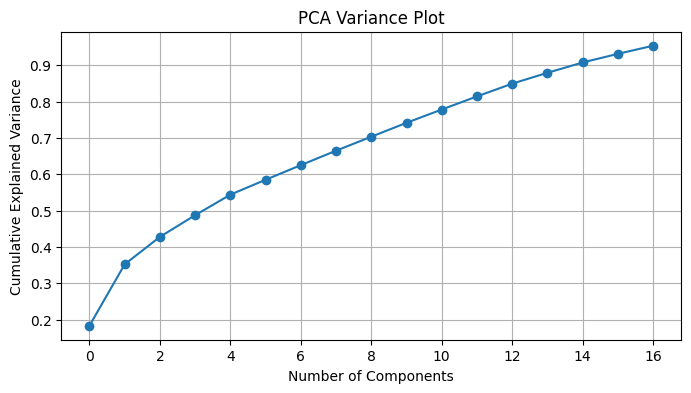

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Plot')
plt.grid(True)
plt.show()

Linear Regression after PCA

In [30]:
x_train_pca = x_pca[df['match_date'].dt.year <= 2022]
x_test_pca = x_pca[df['match_date'].dt.year > 2022]
lr_after_pca = LinearRegression()
lr_after_pca.fit(x_train_pca, y_train)

lr_predict_after_pca = lr_after_pca.predict(x_test_pca)

mae_lr_after_pca = mean_absolute_error(y_test, lr_predict_after_pca)
mse_lr_after_pca = mean_squared_error(y_test, lr_predict_after_pca)
r2_lr_after_pca = r2_score(y_test, lr_predict_after_pca)

print("Mean Absolute Error:", mae_lr_after_pca)
print("Mean Squared Error:", mse_lr_after_pca)
print("R-squared:", r2_lr_after_pca)

Mean Absolute Error: 9.783202744337423
Mean Squared Error: 196.34068873687272
R-squared: 0.8866059355222486
